In [ ]:
import pandas as pd

df = pd.read_excel('data.xlsx')

print("Head of the dataframe:")
df.head()

In [ ]:
print("Tail of the dataframe:")
df.tail()

In [ ]:
print("Description of the Dataset:")
df.describe()

In [ ]:
df.info()


In [ ]:
df.describe()

In [ ]:


df.dropna(subset=['ComputerScience', 'Designation', 'Salary'], inplace=True)

df.drop_duplicates(inplace=True)

relevant_columns = ['ComputerScience', 'Designation', 'Salary', '10percentage', '12percentage', 'collegeGPA']
df_cleaned = df[relevant_columns].copy()

df_cleaned.loc[:, 'Salary'] = pd.to_numeric(df_cleaned['Salary'], errors='coerce')

df_cleaned.rename(columns={'10percentage': '10th Percentage', '12percentage': '12th Percentage'}, inplace=True)

print(df_cleaned.head())


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

def univariate_analysis(numerical_data):
    for column in numerical_data:
        print("-"*8, column, "-"*8)
        print("MEAN: ", numerical_data[column].mean())
        print("MEDIAN: ", numerical_data[column].median())
        print("MODE: ", numerical_data[column].mode())
        print("MIN: ", numerical_data[column].min())
        print("MAX: ", numerical_data[column].max())
        print("KURTOSIS: ", numerical_data[column].kurt())
        print("SKEWNESS: ", numerical_data[column].skew())


univariate_analysis(df[["Salary", "10percentage", "12percentage", "collegeGPA"]])

for col in numerical_cols:
    plt.figure(figsize=(18, 9))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(18, 9))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.tight_layout()
    plt.show()

print('Univariate analysis completed.')

In [ ]:
for i, col1 in enumerate(numerical_cols):
    for col2 in numerical_cols[i+1:]:
        plt.figure(figsize=(18, 9))

        plt.subplot(1, 2, 1)
        sns.scatterplot(x=df[col1], y=df[col2])
        plt.title(f'Scatter Plot of {col1} vs {col2}')

        plt.subplot(1, 2, 2)
        plt.hexbin(df[col1], df[col2], gridsize=30, cmap='Blues')
        plt.colorbar(label='Count')
        plt.title(f'Hexbin Plot of {col1} vs {col2}')

        plt.tight_layout()
        plt.show()

sns.pairplot(df[numerical_cols])
plt.suptitle('Pair Plot of Numerical Columns', y=1.02)
plt.show()

for cat_col in categorical_cols:
    for num_col in numerical_cols:
        plt.figure(figsize=(18, 9))

        plt.subplot(1, 3, 1)
        sns.swarmplot(x=df[cat_col], y=df[num_col])
        plt.title(f'Swarmplot of {cat_col} vs {num_col}')

        plt.subplot(1, 3, 2)
        sns.boxplot(x=df[cat_col], y=df[num_col])
        plt.title(f'Boxplot of {cat_col} vs {num_col}')

        plt.subplot(1, 3, 3)
        sns.barplot(x=df[cat_col], y=df[num_col])
        plt.title(f'Barplot of {cat_col} vs {num_col}')

        plt.tight_layout()
        plt.show()

for i, cat_col1 in enumerate(categorical_cols):
    for cat_col2 in categorical_cols[i+1:]:
        crosstab = pd.crosstab(df[cat_col1], df[cat_col2])
        crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
        plt.title(f'Stacked Bar Plot of {cat_col1} vs {cat_col2}')
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()

print('Bivariate analysis completed.')


In [ ]:
cs_graduates = df_cleaned[~df_cleaned['ComputerScience'].isna()]

roles = ['Programming Analyst', 'Software Engineer', 'Hardware Engineer', 'Associate Engineer']
cs_graduates_relevant = cs_graduates[cs_graduates['Designation'].str.contains('|'.join(roles), case=False, na=False)]

average_salary = cs_graduates_relevant['Salary'].mean()

claim_test = (average_salary >= 250000) and (average_salary <= 300000)

print(f"Average Salary of relevant job roles: {average_salary:.2f}")
print(f"Does the average salary fall within the claimed range (250,000 - 300,000)? {claim_test}")


Average Salary of relevant job roles: 349102.41
Does the average salary fall within the claimed range (250,000 - 300,000)? False


Columns in df_cleaned: ['ComputerScience', 'Designation', 'Salary', '10percentage', '12percentage', 'collegeGPA', 'Gender']
Updated Columns in df_cleaned: ['ComputerScience', 'Designation', 'Salary', '10percentage', '12percentage', 'collegeGPA', 'Gender', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']
Chi-Squared Statistic: 0.0
P-Value: 1.0


<Figure size 1000x600 with 0 Axes>

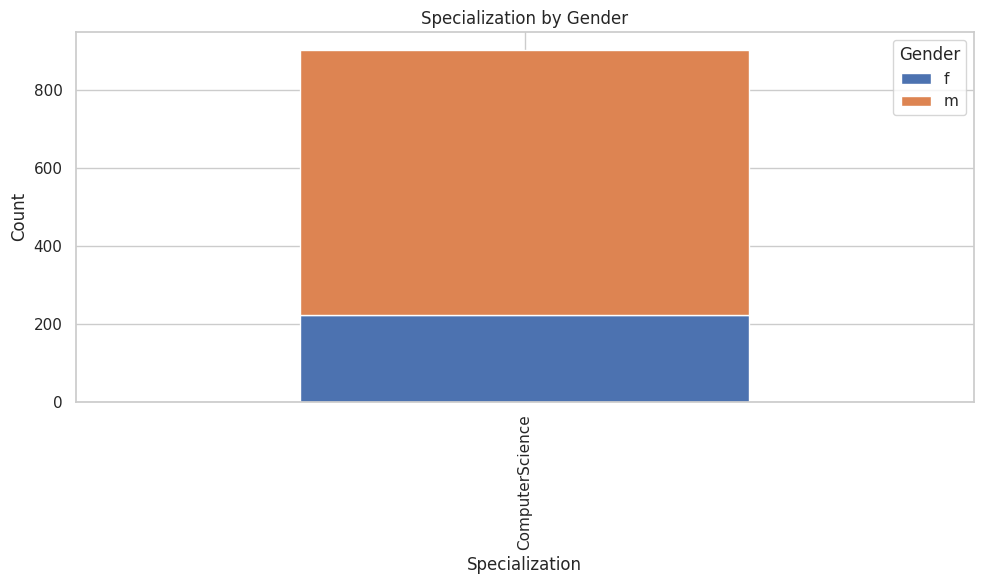

In [ ]:
import scipy.stats as stats

df.dropna(subset=['ComputerScience', 'Designation', 'Salary'], inplace=True)

df.drop_duplicates(inplace=True)

relevant_columns = ['ComputerScience', 'Designation', 'Salary', '10percentage', '12percentage', 'collegeGPA', 'Gender']
df_cleaned = df[relevant_columns].copy()

df_cleaned['Salary'] = pd.to_numeric(df_cleaned['Salary'], errors='coerce')

print("Columns in df_cleaned:", df_cleaned.columns.tolist())

specialization_columns = ['ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']

for col in specialization_columns:
    if col not in df_cleaned.columns:
        df_cleaned[col] = pd.NA

print("Updated Columns in df_cleaned:", df_cleaned.columns.tolist())

df_specialization = df_cleaned[df_cleaned[specialization_columns].notna().any(axis=1)]

def get_specialization(row):
    for col in specialization_columns:
        if pd.notna(row[col]) and row[col] > -1:
            return col
    return pd.NA

df_specialization['Specialization'] = df_specialization.apply(get_specialization, axis=1)

df_specialization.dropna(subset=['Specialization'], inplace=True)

contingency_table = pd.crosstab(df_specialization['Gender'], df_specialization['Specialization'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

p_value = p
print("Chi-Squared Statistic:", chi2)
print("P-Value:", p_value)

plt.figure(figsize=(10, 6))
specialization_distribution = pd.crosstab(df_specialization['Specialization'], df_specialization['Gender'])
specialization_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Specialization by Gender')
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


# New Section